In [ ]:
import os
from pathlib import Path
import sys

# path to project root (one level up from scripts/)
project_root = Path.cwd().parent

# Add 'src' to sys.path so Python can find 'src' packages
src_folder = project_root / "src"
sys.path.append(str(src_folder))

# import from src folder
from data_preprocessing import *
from config import orders_path, products_path, departments_path, aisles_path, order_products_path


In [2]:
# load data
orders = load_data(orders_path)
products = load_data(products_path)
departments = load_data(departments_path)
aisles = load_data(aisles_path)
order_products = load_data(order_products_path)

In [3]:
# explore
print(orders.head())
print(products.head())
print(departments.head())
print(aisles.head())
print(order_products.head())



   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                    

In [4]:
# create dict of dfs
dfs = {
    'orders': orders,
    'products': products,
    'departments': departments,
    'aisles': aisles,
    'order_products': order_products
}

# review dfs
print("Review data:\n")
for name, df in dfs.items():
    print(f"{name}.info()\n")
    print(df.info())
    print(f"{name}.head()\n")
    print(df.head())
    print(f"{name}.describe()\n")
    print(df.describe(include='all'))
    print("\n" + "-"*50 + "\n")

Review data:

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
orders.head()

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   1967

In [5]:
# Review each col for mislabeled missing data
print("Review missing data:\n")
for name, df in dfs.items():
    total_rows = df.shape[0]
    for col in df.columns:
        non_missing_count = df[col].count()
        missing_count = total_rows - non_missing_count
        print(f"Location: {name}[{col}]")
        print(f"  Total rows: {total_rows}")
        print(f"  Non-missing values: {non_missing_count}\n")
        print(f"  Missing values: {missing_count}")
        print(f"  .isnull() count: {df[col].isnull().sum()}\n")
    print("\n" + "-"*50 + "\n")

# only orders, products and order_products have missing values.

Review missing data:

Location: orders[order_id]
  Total rows: 478967
  Non-missing values: 478967

  Missing values: 0
  .isnull() count: 0

Location: orders[user_id]
  Total rows: 478967
  Non-missing values: 478967

  Missing values: 0
  .isnull() count: 0

Location: orders[order_number]
  Total rows: 478967
  Non-missing values: 478967

  Missing values: 0
  .isnull() count: 0

Location: orders[order_dow]
  Total rows: 478967
  Non-missing values: 478967

  Missing values: 0
  .isnull() count: 0

Location: orders[order_hour_of_day]
  Total rows: 478967
  Non-missing values: 478967

  Missing values: 0
  .isnull() count: 0

Location: orders[days_since_prior_order]
  Total rows: 478967
  Non-missing values: 450148

  Missing values: 28819
  .isnull() count: 28819


--------------------------------------------------

Location: products[product_id]
  Total rows: 49694
  Non-missing values: 49694

  Missing values: 0
  .isnull() count: 0

Location: products[product_name]
  Total rows: 4

In [6]:
# MCAR analysis
print("MCAR analysis")
cols_with_missing_values = {
    'orders': ['days_since_prior_order'],
    'products': ['product_name'],
    'order_products': ['add_to_cart_order']
}

for name, df in dfs.items():
    if name in cols_with_missing_values:
        for col in cols_with_missing_values[name]:
            if col in df.columns:
                print(f"{name}[{col}] missing rows:")
                print(df[df[col].isna()])
                print("\n")
            else:
                print("\n")



MCAR analysis
orders[days_since_prior_order] missing rows:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN 

In [7]:
# Display rows where the product_name column has missing values
products[products['product_name'].isna()]

# all rows with missing product_name might be aisle_id 100 and department_id 21.

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [8]:
# Check for missing product names in aisles other than 100
missing_products_product_name_not_aisle_100 = (
    products
    .loc[
        (products['product_name'].isna()) &
        (products['aisle_id'] != 100)
        ]
    )

print(missing_products_product_name_not_aisle_100)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [9]:
# Check for missing product names in aisles other than 21
missing_products_product_name_not_dept_21 = (
    products
    .loc[
        (products['product_name'].isna()) &
        (products['department_id'] != 21)])

print(missing_products_product_name_not_dept_21)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [10]:
# Checking what this aisle (90-110) and department [15-25] is.
print(aisles
      .loc[
          (aisles['aisle_id'] > 90) & (aisles['aisle_id'] < 110),
          ['aisle_id','aisle']])

print(departments.loc[
    (departments['department_id'] >= 15) & (departments['department_id'] <= 25) ,
    ['department_id','department']])

     aisle_id                       aisle
90         91             soy lactosefree
91         92           baby food formula
92         93            breakfast bakery
93         94                         tea
94         95         canned meat seafood
95         96                  lunch meat
96         97       baking supplies decor
97         98               juice nectars
98         99     canned fruit applesauce
99        100                     missing
100       101      air fresheners candles
101       102         baby bath body care
102       103          ice cream toppings
103       104           spices seasonings
104       105  doughs gelatins bake mixes
105       106      hot dogs bacon sausage
106       107              chips pretzels
107       108        other creams cheeses
108       109                   skin care
    department_id    department
14             15  canned goods
15             16    dairy eggs
16             17     household
17             18        babies


In [11]:
# orders:
# Rows where the days_since_prior_order column has missing values
print(orders
      [orders['days_since_prior_order'].isna()]
      .sample(30,random_state=1))

# Missing values where it's not a customer's first order
print(orders[
    (orders['days_since_prior_order'].isna()) & (orders['order_number'] != 1)])
'''
Nan on days_since_prior_order when it's their first order makes sense.
'''

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
27757    2971010    45664             1          4                  9   
415337    293492   116320             1          4                 16   
256537   1260418   127271             1          4                  8   
98945    3240610   147389             1          1                  8   
446520   2702253   114531             1          6                 14   
164987   2889615   153576             1          5                 15   
431735    536100   138001             1          1                  8   
53548    3017250    30506             1          4                 13   
338287   2928233    42943             1          0                 15   
39571    2298882   125025             1          6                 10   
166733   2508691    75790             1          1                 12   
74262    1222905    89024             1          6                  6   
877      1679956    44159             1          4 

"\nNan on days_since_prior_order when it's their first order makes sense.\n"

In [12]:
# missing values from the order_products table:
# Rows where the add_to_cart_order column has missing values
print(order_products[order_products['add_to_cart_order'].isna()])

# Saving all order IDs with at least one missing value in 'add_to_cart_order'
#numpy array of order_ids
order_ids_with_missing_add_to_cart_order = (
    order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique())

#df of order_ids where add_to_cart_order is missing
order_products_with_missing_add_to_cart_order = (
    order_products[order_products['order_id'].isin(order_ids_with_missing_add_to_cart_order)])

# Size of orders with missing values:
order_sizes = (
    order_products_with_missing_add_to_cart_order.groupby('order_id').size().sort_values())
print("order_sizes: \n",order_sizes.describe())

# min order is 65

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]
order_sizes: 
 count     70.000000
mean      75.942857
std       12.898585
min       65.000000
25%       67.000000
50%       71.000000
75%       78.000000
max      127.000000
dtype: float64


                   Wednesday_orders  Saturday_orders
order_hour_of_day                                   
0                               373              464
1                               215              254
2                               121              177
3                               101              125
4                               108              118
5                               170              161
6                               643              451
7                              1732             1619
8                              3125             3246
9                              4490             4311
10                             5026             4919
11                             5004             5116
12                             4688             5132
13                             4674             5323
14                             4774             5375
15                             5163             5188
16                             4976           

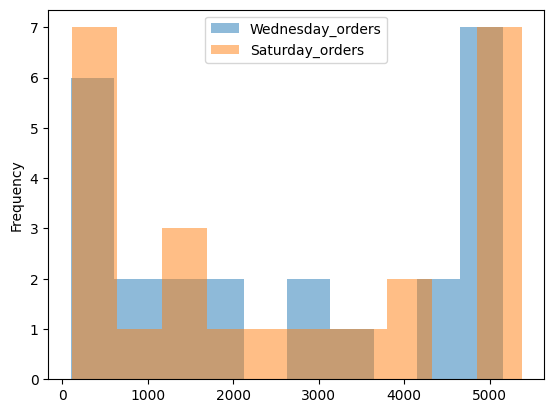

user_id
206196     1
72655      1
72650      1
72647      1
72646      1
          ..
66664     24
134511    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64


<Axes: ylabel='Frequency'>

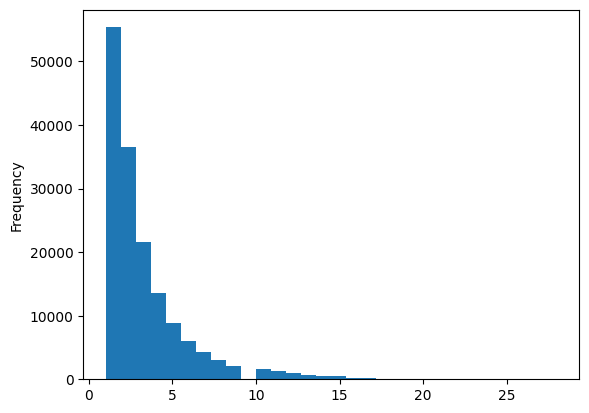

In [13]:
#probe: Is there a difference in 'order_hour_of_day' distributions on Wednesdays and Saturdays:
#Wednesday orders
Wednesday_orders = orders[orders['order_dow'] == 3]
Wednesday_orders_per_hour_of_day = (
    Wednesday_orders['order_hour_of_day']
    .value_counts()
    .sort_index())

#Saturday orders
Saturday_orders = orders[orders['order_dow'] == 6]
Saturday_orders_per_hour_of_day = (
    Saturday_orders['order_hour_of_day']
    .value_counts()
    .sort_index())

# make Wednesday Saturday df
order_hour_of_day_Wednesdays_Saturdays = (
    pd.concat([Wednesday_orders_per_hour_of_day,
               Saturday_orders_per_hour_of_day],
              axis = 1))
order_hour_of_day_Wednesdays_Saturdays.columns = ['Wednesday_orders','Saturday_orders']
print(order_hour_of_day_Wednesdays_Saturdays)

# plot
order_hour_of_day_Wednesdays_Saturdays['Wednesday_orders'].plot(
    kind='hist',
    #bins=30,
    label='Wednesday_orders',
    alpha=0.5
)

order_hour_of_day_Wednesdays_Saturdays['Saturday_orders'].plot(
    kind='hist',
    #bins=30,
    label='Saturday_orders',
    alpha=0.5
)

plt.legend()
plt.show()

# Distribution of number of orders per customer
# group order by user_id and sort
customers_number_of_orders = (
    orders
    .groupby('user_id')['order_id']
    .count()
    .sort_values(ascending = True))
print((customers_number_of_orders))

# plot
customers_number_of_orders.plot(
    kind = 'hist',
    bins = 30 #since there are less than 30 numbers, I wanted to see more detail.
)

product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
dtype: int64


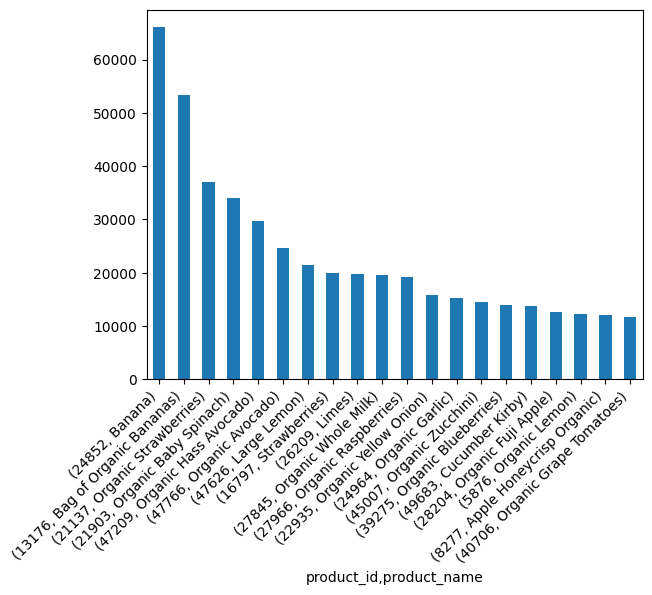

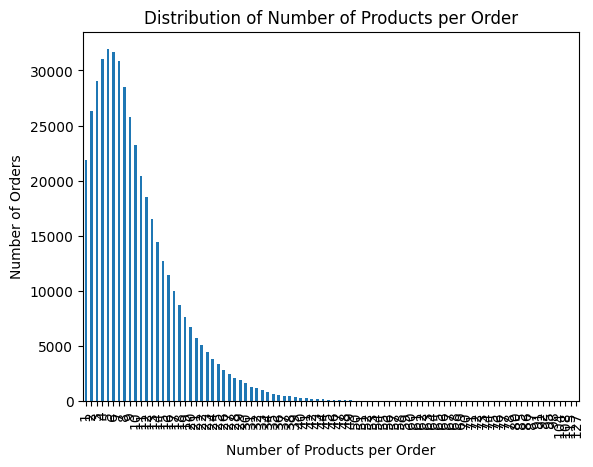

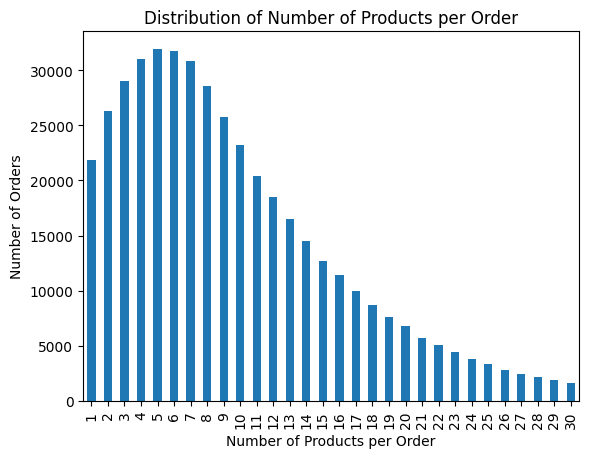

           order_id    product_id  add_to_cart_order  reordered
count  2.683838e+06  2.683838e+06       2.683519e+06  2683838.0
mean   1.711745e+06  2.561835e+04       7.564969e+00        1.0
std    9.850130e+05  1.400587e+04       6.580405e+00        0.0
min    4.000000e+00  1.000000e+00       1.000000e+00        1.0
25%    8.617370e+05  1.362900e+04       3.000000e+00        1.0
50%    1.711580e+06  2.500500e+04       6.000000e+00        1.0
75%    2.562678e+06  3.773100e+04       1.000000e+01        1.0
max    3.421071e+06  4.969400e+04       6.400000e+01        1.0
         order_id  product_id  add_to_cart_order  reordered  \
0          567889        1560                1.0          1   
1         2261212       26683                1.0          1   
2          491251        8670               35.0          1   
3         2571142        1940                5.0          1   
4         2456893       21616                4.0          1   
...           ...         ...                .

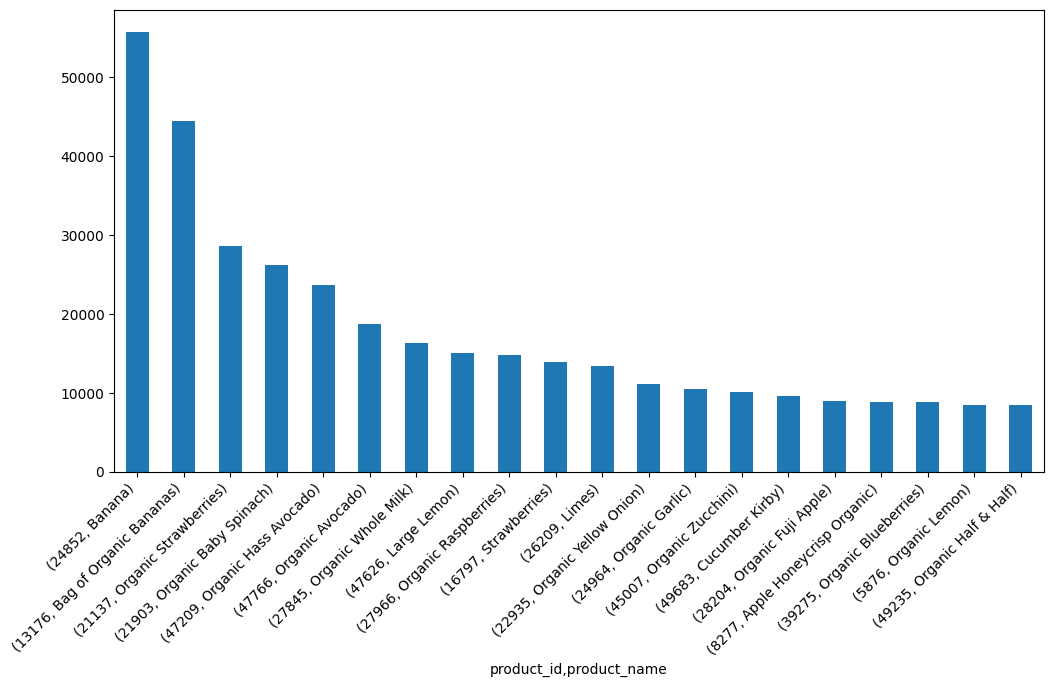

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440               17.0          0   
1    567889        1560                1.0          1   
2   2261212       26683                1.0          1   
3    491251        8670               35.0          1   
4   2571142        1940                5.0          1   

                                        product_name  
0                     Chicken Breast Tenders Breaded  
1                                         Bag Of Ice  
2  Cafe Latte Pure Lightly Sweetened Iced Coffee ...  
3                                     Diced Tomatoes  
4                        Organic 2% Reduced Fat Milk  
count    44613.000000
mean         0.389403
std          0.270662
min          0.000000
25%          0.170213
50%          0.413043
75%          0.578231
max          1.000000
Name: reordered, dtype: float64
        user_id  reordered
0        206164        1.0
1         17973        1.0
2        196795        1.0
3        19

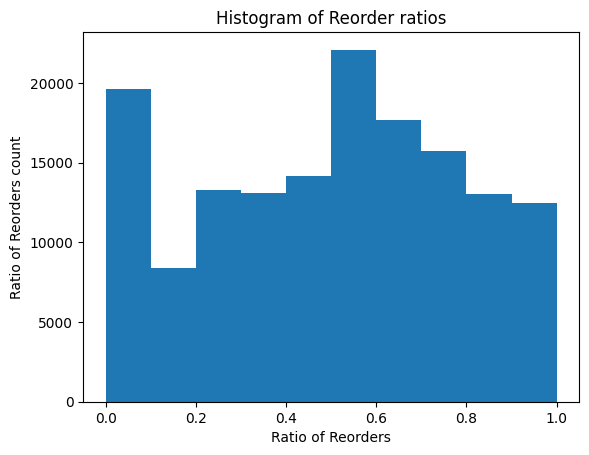

         product_id  order_id  add_to_cart_order  \
0             11440   2141543               17.0   
1              1560    567889                1.0   
2             26683   2261212                1.0   
3              8670    491251               35.0   
4              1940   2571142                5.0   
...             ...       ...                ...   
4545002       15290    577211               12.0   
4545003       21914   1219554                9.0   
4545004       47766    692640                4.0   
4545005         691    319435                8.0   
4545006       28733   1398151                9.0   

                                              product_name  
0                           Chicken Breast Tenders Breaded  
1                                               Bag Of Ice  
2        Cafe Latte Pure Lightly Sweetened Iced Coffee ...  
3                                           Diced Tomatoes  
4                              Organic 2% Reduced Fat Milk  
...      

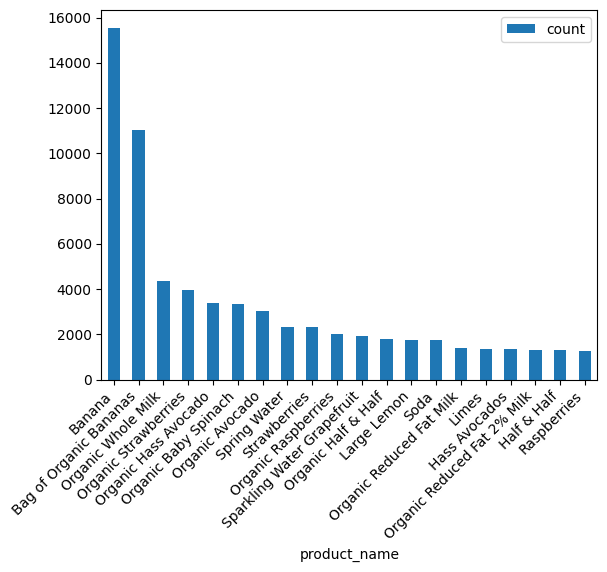

"\nThe products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water.\nI couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products.\nI do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types.\nIt could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.\n"

In [14]:
# top 20 popular products:
# Merge order_products and products
order_products_names = (
    order_products[['order_id', 'product_id']]
    .merge(products[['product_id', 'product_name']],
           on='product_id',
           how='left')
)

# Group by both product_id and product_name and count
ordered_products_count = (
    order_products_names
    .groupby(['product_id', 'product_name'])
    .size()
    .sort_values(ascending=False)
)

# View the top 20 products
print(ordered_products_count.head(20))

# plot top 20
ordered_products_count.iloc[:20].plot(
    kind = 'bar'
)
plt.xticks(rotation=45, ha='right')
plt.show()

# number of items bought per order
products_ids_value_counts = (
    order_products[['order_id','product_id']]
    .groupby('order_id')['product_id']
    .count()
    .value_counts()
    .sort_index()
)

#plot
products_ids_value_counts.plot(
    kind='bar',
    title='Distribution of Number of Products per Order',
    xlabel='Number of Products per Order',
    ylabel='Number of Orders'
)
plt.show()

'''Most of the order numbers are in the tail of the distribution. '''

#plot
products_ids_value_counts[:30].plot(
    kind='bar',
    #bins=10,
    #edgecolor='black',
    title='Distribution of Number of Products per Order',
    xlabel='Number of Products per Order',
    ylabel='Number of Orders',
    #grid=True
)
plt.show()

# top 20 reordered items
# filter
reordered_products = order_products[order_products['reordered'] == 1]
print(reordered_products.describe())

#merge reordered_products and products
reordered_products = (reordered_products
                      .merge(
                          products[['product_name','product_id']],
                          on = 'product_id',
                          how = 'left',
                      ))
print(reordered_products)

#groupby: product_id' , 'product_name
reordered_products_count = (
    reordered_products
    .groupby(['product_id' , 'product_name'])
    .size()
    .sort_values(ascending=False))
print(reordered_products_count.head())

# visualize the top 20 reordered products
reordered_products_count[:20].plot(
    kind='bar',
    x='product_name',
    y='count',
    legend=False,
    figsize=(12, 6)
)
plt.xticks(rotation=45, ha='right')
plt.show()

# For each product, proportion that are reorders:
#Merge the datasets: Combine order_products with the products dataset to access product names and IDs in the same DataFrame.
order_products_with_product_names = (
    order_products.merge(
        products[['product_id','product_name']], #only merges common key, and the col I want.
        on = 'product_id', #key
        how = 'left' #keeps left, just adds new col.
    ))
print(order_products_with_product_names.head())

#Group the data: Group by product_id and product_name to isolate each product's order history.
agg_dict = {'reordered': 'mean'}

product_names_product_id = (
    order_products_with_product_names
    .groupby(['product_name'])
    .agg(agg_dict)
    .sort_values(by = 'reordered' , ascending = False)
    .reset_index())
print(product_names_product_id['reordered'].describe())

#Link order and customer information.
agg_dict = {'reordered':'mean'}
orders_with_order_products = (
    orders[['order_id','user_id']]
    .merge(
        order_products[['order_id','product_id','reordered']],
        on = 'order_id',
        how = 'left'
    )
    .groupby('user_id')
    .agg(agg_dict)['reordered']
    .sort_values(ascending = False)
    .reset_index()
)
print(orders_with_order_products)

# plot
orders_with_order_products['reordered'].plot(
    kind='hist',
    x='reordered')

plt.title('Histogram of Reorder ratios')
plt.xlabel('Ratio of Reorders')
plt.ylabel('Ratio of Reorders count')
plt.show()

# top 20 'first' items in the cart:
# Link product names and IDs.
order_products_and_products = (
    order_products[['product_id', 'order_id','add_to_cart_order']] #what we need
    .merge(
        products[['product_id' , 'product_name']], #what we need
        on = 'product_id', #key
        how = 'left' #left merge
    )
)
print(order_products_and_products)

#Filter: add_to_cart_order equals 1, indicating the first item added to the cart.
agg_dict = {'product_name': 'count'}
order_products_and_products = (
    order_products_and_products[order_products_and_products['add_to_cart_order'] == 1][['product_name','add_to_cart_order']]
    .groupby('product_name') #group
    .agg(agg_dict)['product_name'] #count product_name
    .sort_values(ascending = False) #sort
    .reset_index(name = 'count') #turn series to df, name index 'count'
)
print(order_products_and_products.head())

#plot
order_products_and_products[:20].plot(
    kind='bar',
    x='product_name',
    y='count')

plt.xticks(rotation=45, ha='right')
plt.show()

'''
The products that are most often placed into the cart first are produce, dairy, and beverages such as soda or water.
I couldn't really say why that is without experience using Instacart because this could have more to do with app design than properties of the products.
I do notice that there is considerable overlap between this result and the previous result for most popular and most reordered item types.
It could simply be that the app prioritizes popular items as the first suggested purchases, so it happens to be more convenient for customers to place these items in their cart first.
'''

# Notes

For some reason, any item placed in the cart 65th or later has a missing value in the 'add_to_cart_order' column.
Maybe the data type of that column in the database could only hold integer values from 1 to 64.
We've decided to replace the missing values with a code value, 999, that represents an unknown placed in cart order above 64.
We also converted the column to integer data type.
We just need to be careful to remember this if we perform calculations using this column during our analysis.

Other sensible code values we could've used are 0 or -1 because they don't show up elsewhere in the dataset and they don't have any real physical meaning for this variable.

Also note that, for orders with exactly 65 items, we could replace the missing value with 65. But we're going to neglect that for now since we can't determine the 65th item for all orders with 66 items or more.